5 59
6543 dtx 590 sth -0.4 72.2026373095804
6545 dtx 590 sth -0.42000000000000004 72.45317972217745
6547 dtx 590 sth -0.44 72.7038301809811
6549 dtx 590 sth -0.46 72.96501084020704
6551 dtx 590 sth -0.48 73.25644008191132
6553 dtx 590 sth -0.5 73.52580462801512
6555 dtx 590 sth -0.52 73.77250156804246
6557 dtx 590 sth -0.54 74.04831358012807
6559 dtx 590 sth -0.56 74.3363479316932
6561 dtx 590 sth -0.58 74.61101727962816
6563 dtx 590 sth -0.6 74.87747385992061
6565 dtx 590 sth -0.62 75.15957252547588
6567 dtx 590 sth -0.64 75.44276356046271
6569 dtx 590 sth -0.6599999999999999 75.71361039783255
6571 dtx 590 sth -0.6799999999999999 75.97671880251038
6573 dtx 590 sth -0.7 76.27172383297442
6575 dtx 590 sth -0.72 76.55525632162953
6577 dtx 590 sth -0.74 76.81284241819934
6579 dtx 590 sth -0.76 77.09870295487896
6581 dtx 590 sth -0.78 77.39115215310686
6583 dtx 590 sth -0.7999999999999999 77.66650175068094
6585 dtx 590 sth -0.82 77.93878098006441
6587 dtx 590 sth -0.84 78.23092775956644
65

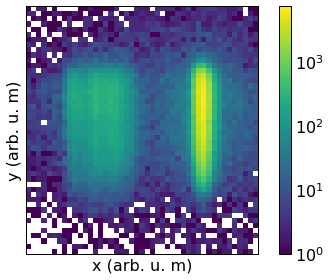

In [3]:
from nicosload import read_pad_file
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import dataEval
import numpy as np
from datafile import Datafile
dat1 = Datafile('kappa')
%matplotlib inline
dtx_vals =[k + 470 for k in [120,140,160,180]+[800]]
sth_vals = np.linspace(-0.4,-1.4,51).tolist() + np.linspace(-1.45,-1.8,8).tolist()
dtxlen = len(dtx_vals)
sthlen = len(sth_vals)
print(dtxlen,sthlen)
all_areas = np.zeros((dtxlen,sthlen))
all_centers = np.zeros((dtxlen,sthlen))
all_amplitudes = np.zeros((dtxlen,sthlen))
all_amplitudesErr = np.zeros((dtxlen,sthlen))
all_sigmas = np.zeros((dtxlen,sthlen))
for file in range(6543,7132,2):
    dtx_ind,sth_ind = divmod((file-6543)//2,59)
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    xtent,ytent = data.shape
    integrated = np.sum(data,axis = 0)
    #dat1 = Datafile('asdf')
    #dat1.fig,dat1.ax = plt.subplots(1,1)

    #dat1.fig,dat1.ax = plt.subplots(1,1) 
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
    if file > 6852 and file < 6854:
        dat1.fig1,dat1.ax1 = plt.subplots(1,1) 
        bar = dat1.ax1.imshow(data[40:88,50:95],norm = LogNorm())
        dat1.ax1.set_xlabel('x (arb. u. m)')
        dat1.ax1.set_ylabel('y (arb. u. m)')
        dat1.ax1.set_xticks([])
        dat1.ax1.set_yticks([])
        plt.tight_layout()
        plt.colorbar(bar)
        #dat1.ax.set_ylabel('Integrated counts')
        #dat1.ax.set_xlabel('x (arb. u. m)')
        #dat1.ax.set_xlim(50,95)
        #dat1.ax.get_legend().remove()
        #dat1.fig1.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Hercules/Poster/posterpictures/MIRAmeasure.png',bbox_inches = 'tight',dpi = 600)
        #dat1.fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Hercules/Poster/posterpictures/MIRAint.png',bbox_inches = 'tight',dpi = 600)
    else:
        pass
        #res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
        #           plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value,]
    #some stuff for error calc
    cenErr = [res.params['g0_center'].stderr,res.params['g1_center'].stderr]
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    print(file,'dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    
    all_sigmas[dtx_ind,sth_ind] = sigmas[i]
    all_amplitudes[dtx_ind,sth_ind] = amplitudes[i]
    all_amplitudesErr[dtx_ind,sth_ind]= ampErr[i]
    all_areas[dtx_ind,sth_ind] = areas[i]
    all_centers[dtx_ind,sth_ind] = centers[i]
    #all_amplitudes(sigma*(2*np.pi)**0.5)
    #plt.plot(integrated)
np.savetxt('fit_data/second_amps',all_amplitudes)
np.savetxt('fit_data/second_amp_err',all_amplitudesErr)
np.savetxt('fit_data/second_sigmas',all_sigmas)
np.savetxt('fit_data/second_centers',all_centers)

In [1]:
from numpy import ceil
power = lambda nodes,tab,asc: (1+nodes*asc*0.05*1.1**tab)
asc = 500
nodes = 8
tab = 35
def tabcost(tab):
    return ceil(1.1**tab*(5+tab))

print('tabcost',tabcost(tab))
def nodecost(node):
    return (2**node)*(5+node)
#nodecost = lambda node: (2**nodes)*(5+nodes)
print('nodecost',nodecost(nodes))
print('node',(power(nodes+1,tab,asc)/power(nodes,tab,asc)),'tab',(power(nodes,tab+1,asc)/power(nodes,tab,asc)))
print('nodec',(power(nodes+1,tab,asc)/power(nodes,tab,asc))**(1/nodecost(nodes))\
                    ,'tabc',(power(nodes,tab+1,asc)/power(nodes,tab,asc))**(1/tabcost(tab)))


tabcost 1125.0
nodecost 3328
node 1.1249777638920482 tab 1.0999822111136386
nodec 1.0000353862240439 tabc 1.0000847093724885


In [2]:
%matplotlib auto
def limit_tab(tab):
    return (1.1)**(1/tabcost(tab))
def limit_nodes(node):
    return ((node+1)/node)**(1/nodecost(node))
print(nodecost(1))
im,ax = plt.subplots(1)
vals = np.linspace(1,50,51)
ax.plot(vals,limit_tab(vals),linestyle = '-',marker = '')
ax.plot(vals,limit_nodes(vals),linestyle = '-', marker ='',color = 'blue')
linevals = np.linspace(1,7,8)
for line in linevals:
    ax.hlines(limit_nodes(line),vals[0],vals[-1],linestyle = '-')

Using matplotlib backend: Qt5Agg
12


In [9]:
#%matplotlib qt
#plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')

from nicosload import read_nicos_file,read_pad_file
%matplotlib qt
dtx_vals = [k for k in range(10,260,30)]+[400,600]
sth_vals = np.linspace(-0.2,-1.8,81)

all_amplitudes = np.loadtxt('fit_data/second_amps')
all_amplitudesErr = np.loadtxt('fit_data/second_amp_err')
all_sigmas = np.loadtxt('fit_data/second_centers')
all_centers = np.loadtxt('fit_data/second_sigmas')
plt.switch_backend('Qt5Agg')

################################### nice image colour plot ######################################
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
im= ax.imshow(all_amplitudes[:,::-1]/10**6,extent=(0,len(sth_vals),0,len(dtx_vals)),aspect = 'auto')

ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')
ax.tick_params(axis='x', rotation=45)
ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/firstnightMap.pdf',bbox_inches = 'tight')

############################ Contour plot #####################################################ä#
#fig = plt.figure(figsize = (10,4))
#ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

bl= ax.contour(all_amplitudes[::-1,::-1]/10**6, extent=(0,len(sth_vals),0,len(dtx_vals)), colors = 'black',aspect = 'auto',levels = 10,\
              linewidths = 1)
#cl= ax.contour(all_amplitudes[::-1,::-1]/10**6,extent=(0,len(sth_vals),0,len(dtx_vals)),aspect = 'auto',levels = 10,linewidths = 1)
#cb = fig.colorbar(im)
ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')

ax.tick_params(axis='x', rotation=45)

ax.axes.yaxis.set_ticks([k+0.5 for k in range(len(dtx_vals))])
ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::-1])

ax.axes.xaxis.set_ticks([k+0.5 for k in range(0,len(sth_vals),4)])
ax.axes.xaxis.set_ticklabels([round(k,2) for k in sth_vals][::-4])
#ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
#ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::-1])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
cb = fig.colorbar(im)
cb.add_lines(bl)
#cb2 = fig.colorbar(bl,)
fig.tight_layout()
fig.savefig("/home/cherb/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnight.pdf",bbox_inches = 'tight')

[(0.5, -0.4), (4.5, -0.48), (8.5, -0.56), (12.5, -0.64), (16.5, -0.72), (20.5, -0.8), (24.5, -0.88), (28.5, -0.96), (32.5, -1.04), (36.5, -1.12), (40.5, -1.2), (44.5, -1.28), (48.5, -1.36), (52.5, -1.5), (56.5, -1.7)]


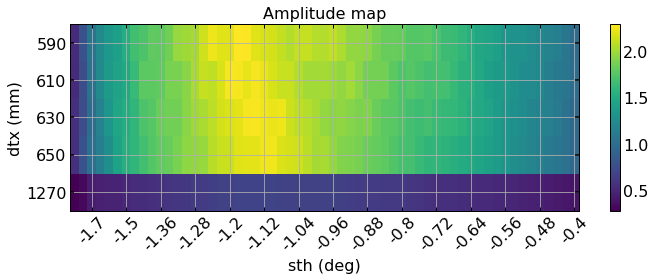

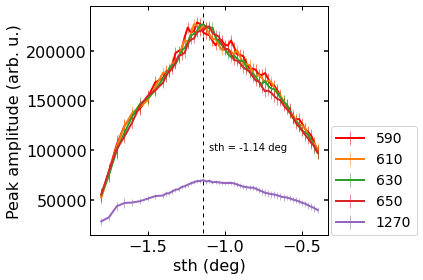

In [4]:
#%matplotlib auto
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}



xplot = [(k+0.5,round(val,3)) for k,val in enumerate(sth_vals)]
#print(xplot)
im = ax.imshow((all_amplitudes[:,::-1]/100000),extent= (59,0,0,5),aspect = 'auto')
cb = fig.colorbar(im)
ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')

ax.tick_params(axis='x', rotation=45)

#the x axis of the plot has to be adjusted
xticks = [tick for tick in xplot[::4]]
print(xticks)
ax.axes.xaxis.set_ticks([k[0] for k in xticks])
ax.axes.xaxis.set_ticklabels([k[1] for k in xticks])

ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,5)])
ax.axes.yaxis.set_ticklabels([k for k in dtx_vals][::-1])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
ax.set_title('Amplitude map')
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightMap.pdf',bbox_inches = 'tight')

fig,ax = plt.subplots(1,1)
for line in range(5):
    
    ax.errorbar(sth_vals,all_amplitudes[line,:],all_amplitudesErr[line,:],\
                label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2,elinewidth = 0.5)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(175000,235000)
ax.legend(fontsize = 14,loc = (1.01,0))
ax.set_xlabel('sth (deg)')
ax.set_ylabel('Peak amplitude (arb. u.)')
maxLine = ax.axvline(-1.14,-1,2,color = 'black')
ax.text(-1.10,100000,'sth = -1.14 deg')
maxLine.set_dashes([4,4])
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightParmap.pdf',bbox_inches = 'tight')

[0, 50, 100, 150, 200] [0, 50, 100, 150, 200]
lasd 140.0 -1.139
0
32
64
96
128
[0, 50, 100, 150, 200]


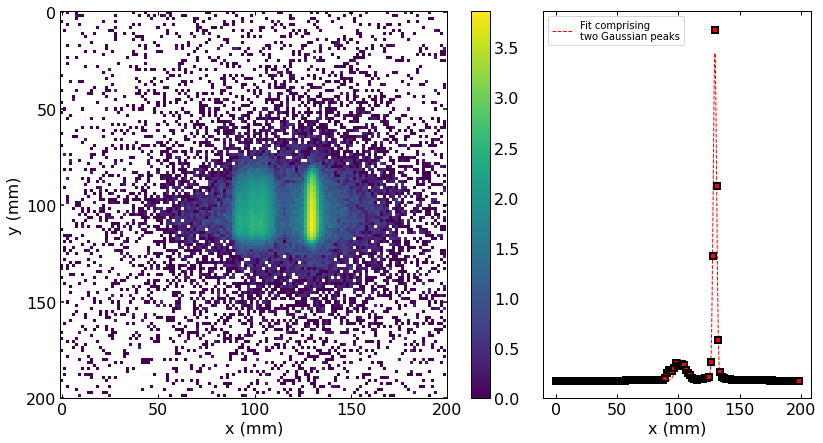

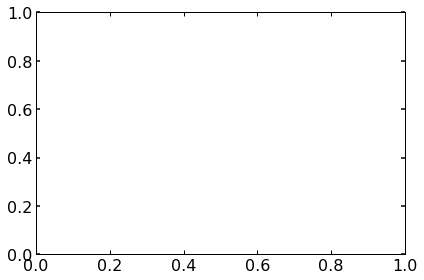

In [3]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
from matplotlib import gridspec 
fig = plt.figure(figsize=(13, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.2, 1])
ax1 = fig.add_subplot(gs[0])
ax0 = fig.add_subplot(gs[1])

data,mes = read_pad_file('data/pad_files/0032{}.pad'.format(6735))
im = ax1.imshow(np.log10(data[::-1,:]),interpolation= 'none')
ax1.axes.xaxis.set_ticks([0,32,64,96,128])
ax1.axes.yaxis.set_ticks([0,32,64,96,128])
#print(ax.axes.xaxis.get_ticklabels())




fig.colorbar(im,ax = ax1,fraction=0.046, pad=0.04)
fig.tight_layout()
xticks = [int(float(k.get_text())*200/128) for k in ax1.get_xticklabels()]
yticks = [int(float(k.get_text())*200/128) for k in ax1.get_yticklabels()]
ax1.axes.xaxis.set_ticklabels(xticks)
ax1.axes.yaxis.set_ticklabels(xticks)

print(xticks,yticks)
print('lasd',mes['dtx_value'],mes['sth_value'])

dat1 = Datafile('asd')
integrated = np.sum((data[::-1,:]),axis = 0)
#ax0.plot(integrated, linestyle=' ')
#
ax0.axes.yaxis.set_ticks([])
xlabels = []

#xlabels = [int(float(k.get_text())*200/128) for k in ax0.get_xticklabels()]
#ax0.set_xticklabels(xlabels)
plt.tight_layout()
#res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
#                    plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
#
#fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightBestfocus.pdf',bbox_inches = 'tight')
#print(sth_vals[47],dtx_vals[4])
xlabels = []
ax0.set_xticks([0,32,64,96,128])
ax0.set_xticklabels([0,32,64,96,128])
for k in ax0.get_xticklabels():
    xlabels.append(int(k.get_text())*200//128)
    print(k.get_text())
print(xlabels)
ax0.set_xticklabels(xlabels)
ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
dat1.fig,dat1.ax = plt.subplots(1,1) 
# gaussian fit
dat1 = Datafile('asdf')
dat1.ax = ax0
res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=1, errs= integrated**0.5,xlabel = 'x',vlines = False)
ax0.set_ylabel(' ')
ax0.set_xlabel('x (mm)')
handles, labels = ax0.get_legend_handles_labels()
labels = ['Fit comprising\ntwo Gaussian peaks']
ax0.legend(handles,labels)
res.params['g0_center'].value
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightBestfocus.pdf',bbox_inches = 'tight')

In [10]:
import importlib
import dataEval
from datafile import Datafile
importlib.reload(dataEval)
#importlib.reload(datafile.Datafile)


roi = (1,127,1,127)
dataEval.calcFlipping('data/pad_files/0032{}.pad'.format(6735),'data/pad_files/0032{}.pad'.format(6736),roi,1)


roi = (56,72,47,77)
dataEval.calcFlipping('data/pad_files/0032{}.pad'.format(6735),'data/pad_files/0032{}.pad'.format(6736),roi,1)

roi,tot = dataEval.calcEff('data/pad_files/0032{}.pad'.format(6735),roi,1)
print(roi/tot)

roi = (79,87,47,77)
roi,tot = dataEval.calcEff('data/pad_files/0032{}.pad'.format(6735),roi,1)
print(roi/tot)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(6735),roi)
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
res

0.16341505098649856
0.77772165359564


&lt;lmfit.model.ModelResult at 0x7f42d78f1130&gt;

In [11]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7177),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7177))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
#dat1.ax.plot(range(500))
plt.show()
res

&lt;lmfit.model.ModelResult at 0x7f42d7b39880&gt;

In [12]:
import importlib
import dataEval
from datafile import Datafile
importlib.reload(dataEval)
#importlib.reload(datafile.Datafile)


roi = (1,127,1,127)
dataEval.calcFlipping('data/pad_files/0032{}.pad'.format(6735),'data/pad_files/0032{}.pad'.format(6736),roi,1)


roi = (56,72,47,77)
dataEval.calcFlipping('data/pad_files/0032{}.pad'.format(6735),'data/pad_files/0032{}.pad'.format(6736),roi,1)

roi,tot = dataEval.calcEff('data/pad_files/0032{}.pad'.format(6735),roi,1)
print(roi/tot)

roi = (79,87,47,77)
roi,tot = dataEval.calcEff('data/pad_files/0032{}.pad'.format(6735),roi,1)
print(roi/tot)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(6735),roi)
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
res

0.16341505098649856
0.77772165359564


&lt;lmfit.model.ModelResult at 0x7f42d8cb7e50&gt;

In [13]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7177),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7177))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
#dat1.ax.plot(range(500))
plt.show()
res

&lt;lmfit.model.ModelResult at 0x7f42d7d5fca0&gt;

In [14]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7251),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7251))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
#dat1.ax.plot(range(500))
plt.show()
res

&lt;lmfit.model.ModelResult at 0x7f42d6ec6df0&gt;

In [15]:
%matplotlib inline
plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')
fig = plt.figure(figsize = (50,15))
ax = fig.add_subplot(1,1,1)
ax.imshow(np.log(all_amplitudes[:,:]))


fig,ax = plt.subplots(1,1)
for line in range(len(dtx_vals)):
    
    ax.plot(sth_vals,all_amplitudes[line,:],label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
ax.legend(fontsize = 16)
#print(sth_vals[47],dtx_vals[4])

ValueError: x and y must have same first dimension, but have shapes (81,) and (59,)

1580.1504166666666
5616.45125
10709.8
19587.088333333333
26666.83
nb 5 5
[1112.676, 3941.32, 7676.14, 13757.746666666666, 18172.7, 2024.8] [1432.877, 5066.766666666666, 9881.22, 18228.2, 24950.46, 2618.6]
[(0, 1.9525498819919216), (1, 3.6929224961404215), (2, 5.102244604093379), (3, 6.901498931391644), (4, 8.053126333915294), (5, 2.6420304691657135)]


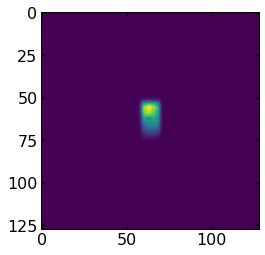

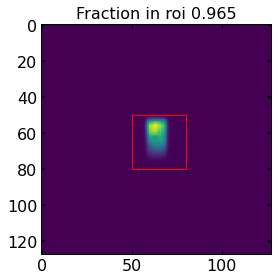

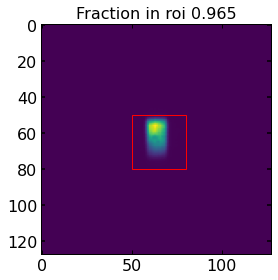

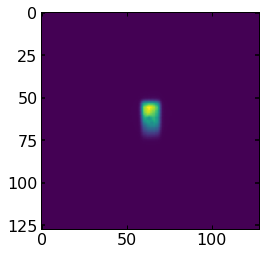

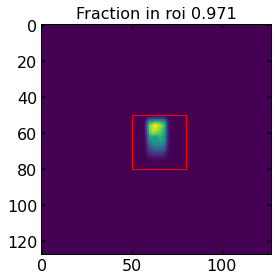

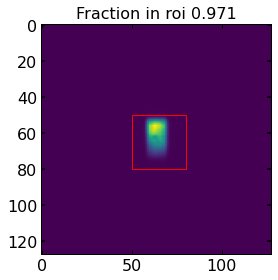

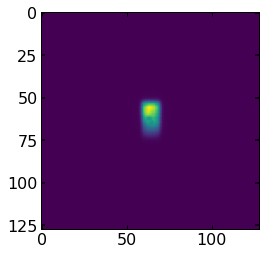

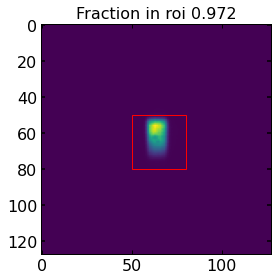

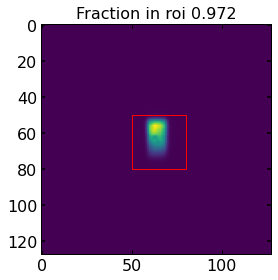

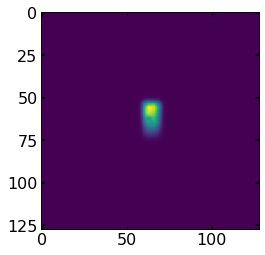

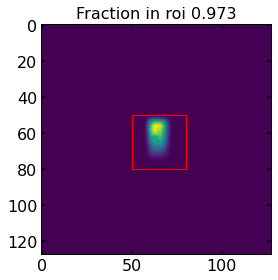

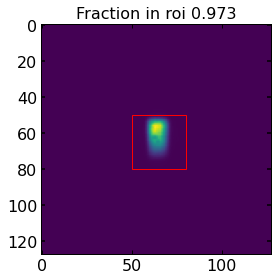

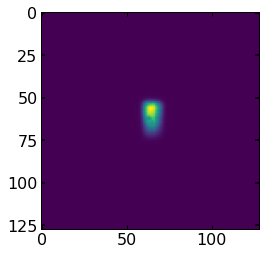

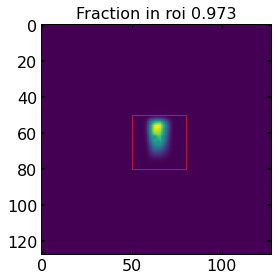

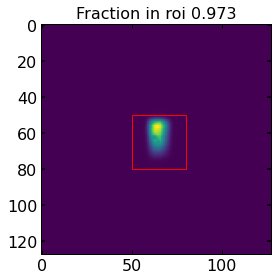

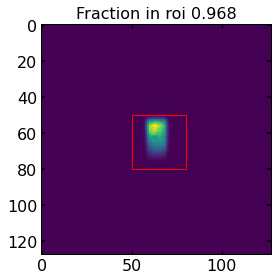

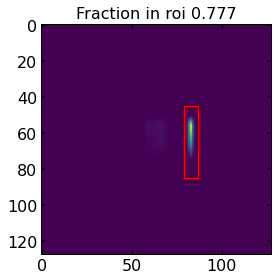

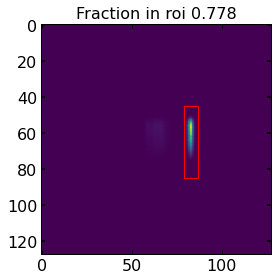

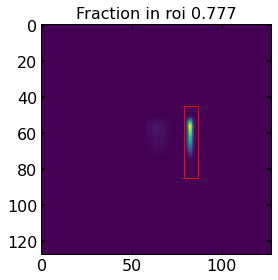

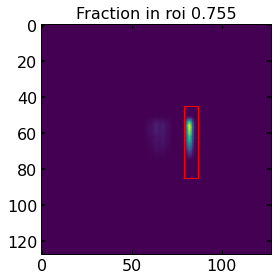

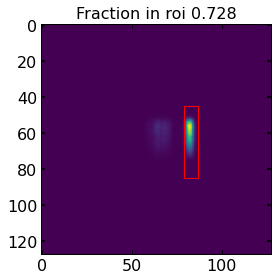

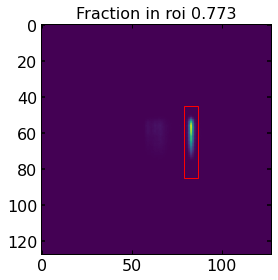

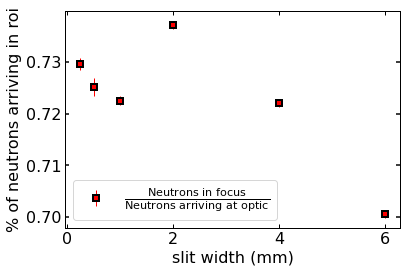

In [16]:
from nicosload import read_pad_file
from dataEval import calcEff
normedBackground,normedBackground_err = [],[]
for ind,files in enumerate(range(7295,7300)):
    path = '/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Measurements/2020_01/MIEZE_foc/data/pad_files/'
    file = path + '0032{}.pad'.format(files)
    file2 = path + '0032{}.pad'.format(files+5)
    data,meta = read_pad_file(file)
    data2,meta2 = read_pad_file(file2)
    time = meta['det_preset']
    time2 = meta2['det_preset']
    fig,ax = plt.subplots(1)
    ax.imshow((data+data2)/(time+time2))
    print((np.sum(data+data2))/(time+time2))
    normedBackground += [((calcEff(file,(50,80,50,80),plot = True))[0]+(calcEff(file2,(50,80,50,80),plot = True))[0])/(time+time2)]
normedBackground_err = [(k*(time+time2))**0.5/(time+time2) for k in normedBackground]
print('nb', len(normedBackground),len(normedBackground_err))    
    
pointfive,meta = read_pad_file(path + '0032{}.pad'.format(7137))
time = meta['det_preset']
normedBackground += [calcEff(path + '0032{}.pad'.format(7137),roi = (50,80,50,80),plot = True)[0]/time]
normedBackground_err = [(k*(time+time2))**0.5/(time+time2) for k in normedBackground]


allRoiLst,allNeutronsLst = [],[]
allRoiLst_err,allNeutronsLst_err = [],[]
for slit,file in [(0.25,7177),(1,7203),(2,7227),(4,7251),(6,7279),(0.5,6621)]:
    roi,allNeutrons =calcEff(path + '0032{}.pad'.format(file),roi = (79,87,45,85),plot = True)
    _,meta = read_pad_file(path + '0032{}.pad'.format(file))
    time = meta['det_preset']
    #print(time)
    roi_err, allNeutrons_err = roi**0.5/time,allNeutrons**0.5/time
    roi,allNeutrons = roi/time,allNeutrons/time
     
    allRoiLst += [roi]
    allNeutronsLst += [allNeutrons]
    allRoiLst_err += [roi_err]
    allNeutronsLst_err += [allNeutrons_err]
print(allRoiLst,allNeutronsLst)
print([(ind,k) for ind,k in enumerate(normedBackground_err)])
relEff = [allRoiLst[k] / normedBackground[k] for k in range(len(allRoiLst))]
relEffErr = [relEff[k]*((allRoiLst_err[k]/allRoiLst[k])**2 + (normedBackground_err[k]/normedBackground[k])**2)**0.5 for k in range(len(allRoiLst))]
fig,ax = plt.subplots(1)

params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

ax.errorbar([0.25,1,2,4,6,0.5],np.array(relEff),np.array(relEffErr),linestyle = ' ',label = r"$\frac{\mathrm{Neutrons\ in\ focus}}{\mathrm{Neutrons\ arriving\ at\ optic}}$")
ax.set_xlabel('slit width (mm)')
ax.set_ylabel('% of neutrons arriving in roi')
ax.legend(fontsize = 16)
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/efficiency.pdf',bbox_inches = 'tight')